In [1]:
%pylab inline --no-import-all
import ROOT

Populating the interactive namespace from numpy and matplotlib


In [2]:
import rootnotes
c1 = rootnotes.default_canvas()

In [3]:
%ls csv

ConvertToRoot.C                        parameterized_inc05_indexed.root?dl=0
fixed.csv                              parameterized_inc10.csv
parameterized_inc05.csv.gz             parameterized_inc10.root
parameterized_inc05.root               parameterized_inc10_indexed.root


In [4]:
f= ROOT.TFile('csv/parameterized_inc10_indexed.root')
tree = f.Get('parameterized')

In [5]:
tree.Print()

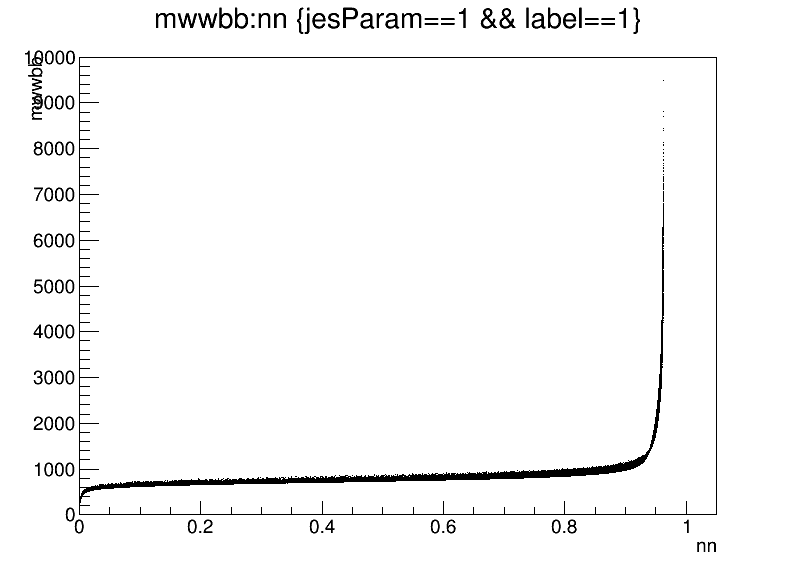

In [8]:
tree.Draw('mwwbb:nn','jesParam==1 && label==1')
c1

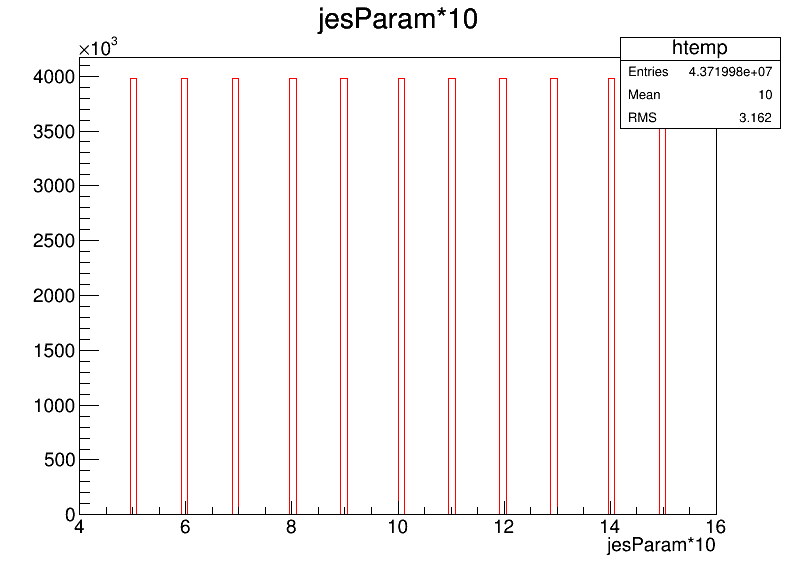

In [13]:
tree.Draw('jesParam*10','','')
c1

In [15]:
jesParamValues = np.linspace(5,15,11)/10
jesParamValues

array([ 0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5])

label==0 && jesTrue==0.75
0.75 1505592
label==0 && jesTrue==0.9
0.9 1505592
label==0 && jesTrue==0.95
0.95 1505592
label==0 && jesTrue==0.975
0.975 1505592
label==0 && jesTrue==1
1 1505592
label==0 && jesTrue==1.025
1.025 1505592
label==0 && jesTrue==1.05
1.05 1505592
label==0 && jesTrue==1.1
1.1 1505592
label==0 && jesTrue==1.25
1.25 1505592


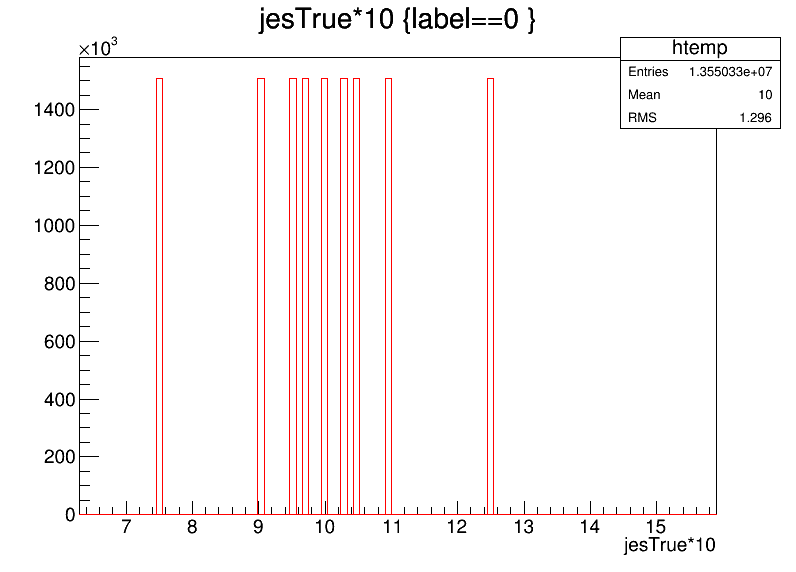

In [12]:
jesTrueValues = [0.75, 0.9, 0.95, 0.975, 1, 1.025, 1.05, 1.1, 1.25]
tree.SetLineColor(0)
tree.Draw('jesTrue*10','label==0 ')
tree.SetLineColor(2)
for i in jesTrueValues:
    print 'label==0 && jesTrue==%s' %(i)
    print i, tree.Draw('jesTrue*10','label==0 && fabs(jesTrue-%s)<0.001' %(i),'same')
c1

In [24]:
histograms = []
for jesTrue in jesTrueValues:
    for jesParam in jesParamValues:
        for label in [0,1]:
            title = 'h_%.3f_%.3f_%d' %(jesTrue, jesParam,label)
            print title
            h = ROOT.TH1F(title, 'test',100,0,1)
            histograms.append(h)
            cut = 'fabs(jesTrue-%f)<0.001 && fabs(jesParam-%f)<0.001 && label == %d' \
            %(jesTrue, jesParam,label)
            print cut
            tree.Draw('nn >> '+title, cut)   



h_0.750_0.500_0
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-0.500000)<0.001 && label == 0
h_0.750_0.500_1
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-0.500000)<0.001 && label == 1
h_0.750_0.600_0
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-0.600000)<0.001 && label == 0
h_0.750_0.600_1
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-0.600000)<0.001 && label == 1
h_0.750_0.700_0
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-0.700000)<0.001 && label == 0
h_0.750_0.700_1
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-0.700000)<0.001 && label == 1
h_0.750_0.800_0
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-0.800000)<0.001 && label == 0
h_0.750_0.800_1
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-0.800000)<0.001 && label == 1
h_0.750_0.900_0
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-0.900000)<0.001 && label == 0
h_0.750_0.900_1
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-0.900000)<0.001 && label == 1
h_0.750_1.000_0
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-1.000000)<0.001 &&

TFile::Append:0: RuntimeWarning: Replacing existing TH1: h_0.750_0.500_0 (Potential memory leak).


In [27]:
for h in histograms:
    print h.GetEntries()

136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
3

In [29]:
newf = ROOT.TFile("histograms_parameterized_inc05.root","RECREATE")
for h in histograms:
    h.GetEntries()
    h.Write()
newf.Close()

In [30]:
len(histograms)

198

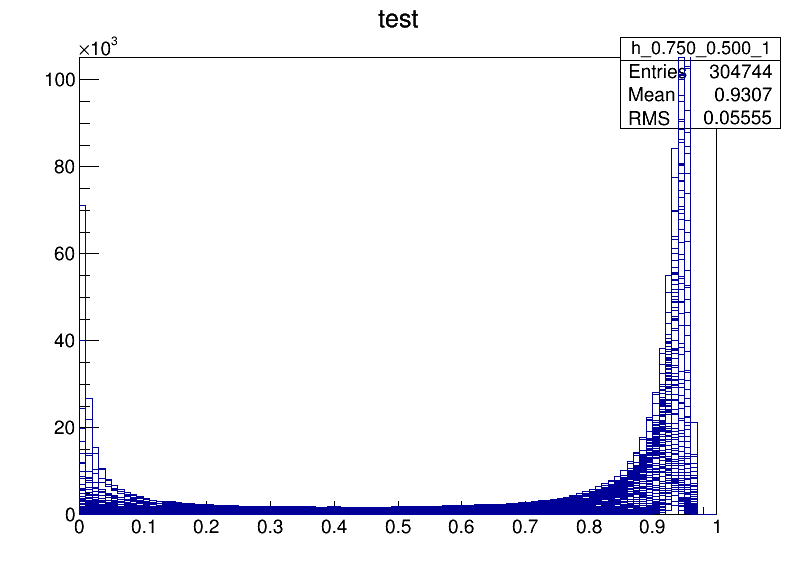

In [34]:
opt = ''
for i in range(99):
    histograms[2*i+1].Draw(opt)
    opt = 'same'
c1